<div class="markdown-google-sans">
 <center> <h1>Laboratory exercise P3: Video annotation and characterization</h1>
</div></centered>



  


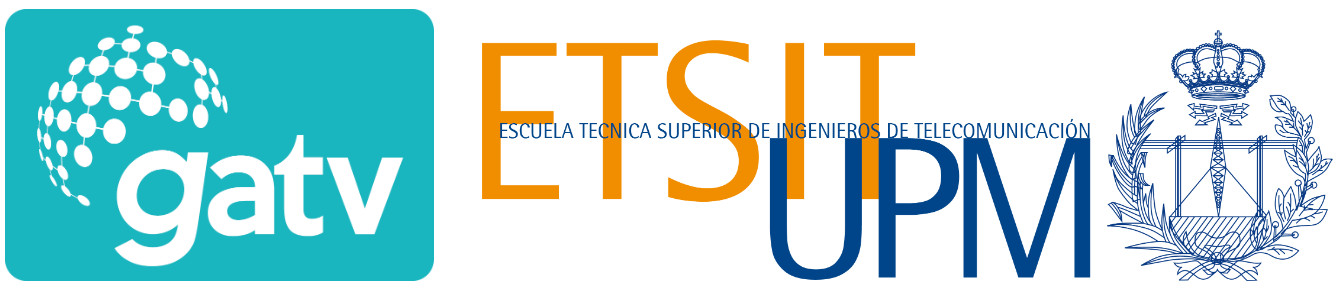

<div class="markdown-google-sans">
  <center> <h2>Media Data Systems Design</h1>
</div></centered>
<div class="markdown-google-sans">
  <center> <h2>Alberto Belmonte, Juan Antonio Rodrigo, José Manuel Menéndez</h1>
</div></centered>

<div class="markdown-google-sans">
  <center> <h2>Grupo de Aplicación de Telecomunicaciones Visuales - GATV
  
  Departamento de Señales, Sistemas y Radiocomunicaciones

  E.T.S. Ingenieros de Telecomunicación

  Universidad Politécnica de Madrid
</div></centered>
<div style="page-break-after: always"></div>

## Table of Contents
* [1. Introduction](#chapter1)
* [2. Purpose of the exercise](#chapter2)
* [3. Tools](#chapter3)
* [4. Practice development](#chapter4)
    * [4.1 HOG](#section_4_1)
    * [4.2 Histograms](#section_4_2)
    * [4.3 Local Binary Patterns](#section_4_3)
    * [4.4 Text detection](#section_4_4)
    * [4.5 Face detection](#section_4_5)
    * [4.6 Deep learning object detection](#section_4_6)
* [5. Discussion](#chapter5)      

<div class="markdown-google-sans">

## <strong>1. Introduction</strong>
</div>

Video annotation for Artificial Intelligence (AI) is the process of creating labels or metadata associated to a video segment. It involves adding metadata to video data to train AI computer vision models. This can be done manually or, to a certain degree, automatically. Automatic annotation can be performed through predetermined mathematical equations or derived from a previous trained AI, thus creating a chained process from which more complex labels can be obtained recursively. The labels can be anything from simple image/video descriptors, identification of objects or distinguishing complex actions and emotions. The scope of this annotation is to create a group of labels that, if selected properly, can characterize the video in order to assign a group pertenance to the video, based on some prevoius cryteria (eg. is it a video where people appear?, is it a video with high motion?, is it a video with low quality?...). The group of labels that describe an video are known as video descriptors.

<div class="markdown-google-sans">

  ## <strong>2. Purpose of the exercise</strong>
</div>


This exercise is meant to be a comprehensive guide for semi-automatic video annotation and characterization. In order to achieve this, several video feature extraction algorithms are proposed to test their possibilities to obtain differential data that can be useful to characaterize different videos. Most of the algorithms here proposed fulfill a final purpose but also can be used as feature extractors for labelling purposes, thus special attention should be paid to understand the code and detect how it can be tweaked to adapt the performance of the algorithm to the desired labelling process and to understand the data label storage.

All the different algorithms are divided throughout the excercise related to the features they aim to extract as follows:
- Histogram of Oriented Gradients
- Color and grayscale histograms
- Local Binary Patterns
- Text detection
- Face detection
- Deep Learning object detection

Furthermore, the guide is meant to give a certain amount of knowledge on the use of some image and video libraries throughout the excercise.  

<div class="markdown-google-sans">

  ## <strong>3. Materials</strong>
</div>

All the materials will be available online without any download. In this way you can connect your drive to the material provided and work directly in google colab without any additional installation in your own computer or drive.

This document has been created as a Jupiter Notebook to be executed in the Google Colab environment for ease of use. This document is mainly a Jupyter Notebook format. It is made of text cells and code cells. To add a cell to the document just use the ***+Code*** or the ***+Text*** situated on the top left corner of the document. To edit a cell doucle click on the cell to get into edition mode. To run a code cell click on the play button that appears when the mouse is on the [ ] symbol on the left of the cell.

If a block is marked as *hidden* just click on the triangle on the left of the cell that preceeds the hidden block to unfold it.

For more informartion on using Google Colab you can take a look <a href="https://web.eecs.umich.edu/~justincj/teaching/eecs442/WI2021/colab.html">here</a>, for example,  among a lot of other places.

During the excercise the student will be asked to answer some questions and write some code. To do this, some empty cells have been created. Use this cells or create new ones as needed.

To enable this document to get access to the extra material you have to follow the following step:

1. In moodle you will have the link to access all the contents. If you open the link you will see all the material needed to this part. There is a a first notebook in the folder "How_to_use_the_materials" and follow the first steps at the begining.

2. Create the direct access like you have in the notebook and now you will have access to all the materials with any modification in the paths.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

!cp /content/drive/MyDrive/MEDS/Lesson5/Practice/datasets_utils/utils.py /content

In [3]:
additional_data_path ="/content/drive/MyDrive/MEDS/Lesson5/Practice/datasets_utils/"

The code provided in this document is divided in two parts for each feature extraction: the analysis of the image/video and the representation of the data obtained by this analysis for visualisation purposes. Take into account that it is important to understand the code and detect where the results from the analysis are saved, not only the visual results, as they are going to be used in a future exercise.

Bear also in mind the result of this laboratory exercise will be a copy of your jupyter notebook file with your answers report describing your work, implementations, corresponding results and key points to be addressed after each of the implementations enumerated throughout this document, as detailed in section 6. **Please follow the instructions provided in section 6 to upload your report**.

<div class="markdown-google-sans">

  ## <strong>4. Practice development</strong>
</div>

<div class="markdown-google-sans">

### <strong>4.1 Histogram of Oriented Gradients (HOG)</strong>
</div>

The Histogram Of Oriented Gradients (HOG) is a feature descriptor that is often used to extract features from image data. It is widely used in computer vision tasks for object detection.

Some important aspects of HOG that makes it different from other feature descriptors:

- The HOG descriptor focuses on the structure or the shape of an object. It differs from an edge detection feature in the fact that the HOG is able to provide the edge direction as well. This is done by extracting the gradient and orientation (or you can say magnitude and direction) of the edges
- Additionally, these orientations are calculated in *‘localized’* portions. This means that the complete image is broken down into smaller regions and for each region, the gradients and orientation are calculated.
- Finally the HOG generates a Histogram for each of these regions separately. The histograms are created using the gradients and orientations of the pixel values, hence the name ‘Histogram of Oriented Gradients’

To put a formal definition to this:

The HOG feature descriptor counts the occurrences of gradient orientation in localized portions of an image.

In [ ]:
input= additional_data_path+"dog.jpeg" # image path

<div class="markdown-google-sans">

#### Import dependencies
</div>

In [ ]:
#importing required libraries
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline

<div class="markdown-google-sans">

#### Read and show the image
</div>

In [ ]:
#reading the image
img = imread(input)
imshow(img)
print(img.shape)

<div class="markdown-google-sans">

#### Resize and show the image
</div>

In [ ]:
#resizing image
resized_img = resize(img, (128,64))
imshow(resized_img)
print(resized_img.shape)

<div class="markdown-google-sans">

#### Apply the HOG algorithm
</div>

Here, we are going to use the function from *skimage.features* directly, so we don’t have to calculate the gradients, magnitude (total gradient) and orientation individually. The hog function will internally calculate it and return the feature matrix.

Also, if you set the parameter *‘visualize = True’*, it will return an image of the HOG.

Taken form the <a href="https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.hog">official documentation</a> the different hyperparameters of the function represent:

- *Orientations*: the number of buckets to create. Orientation 9 means a bucket of 9 x 1 matrix.
- *Pixels_per_cell*: the size of the cell for which we create the histograms. In this example, 8 x 8 cells is used.
- *Cells_per_block*: the size of the block over which we normalize the histogram. Here, we mention the cells per blocks and not the number of pixels. So, instead of writing 16 x 16, we will use 2 x 2 here.

In [ ]:
#creating hog features
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)
fd.shape
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)

ax1.imshow(resized_img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

plt.show()
fd.shape

You can choose to change the values of the hyperparameters and that will give you a feature matrix of different sizes.

Make 2 changes and note down the size of the matrix each time.

Change the input to <strong>image.jpg</strong> and repeat the HOG calculation.

Comment on the results.

<font color='blue'> Results with **image.jpg** </font>

In [ ]:
input= additional_data_path+"image.jpg" # image path
img = imread(input)
imshow(img)
print(img.shape)

In [ ]:
#resizing image
resized_img = resize(img, (128,64))
imshow(resized_img)
print(resized_img.shape)

In [ ]:
#creating hog features
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)
fd.shape
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)

ax1.imshow(resized_img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

plt.show()
fd.shape

<font color='blue'>Answer:</font>
- When we change the number of *cells per blocK* **from 2x2 to 8x8** we notice  that the larger the block, the fewer variations the algorithm detects. In the image of the dog, since there aren't many tonal variations, this parameter change isn't very noticeable.

- If we change the number of *pixel per cells* **from 8x8 to 2x2**, we notice more edges besides the outline, the muzzle, and the eyes of the dog become clearer. Fewer pixels mean more details, but the feature vector becomes larger.

- Another change tested is that the larger the orientation, the larger the feature vector. Additionally, with fewer orientations, fewer angles are represented. In the image of the dog, since the head tilt is close to a 45º angle relative to the vertical, these tilts are well captured with fewer orientations.

When the image is changed to **image.jpg**, the following observations are made:
- When doing the *resize* a lot of quality is lost with the given parameters in the practice.
  - orientations: 9
  - pixels per cell: 8x8
  - cells per block: 2x2

  With these parameters, the image looks a bit blurry.
- Unlike the previous image, changing the *number of orientations* to 2 results in very poor contour visibility.
-By changing the following parameters:
  - **orientations:** 18
  - **pixels per cell:** 2x2
  - cells per block: 2x2

  With this configuration, the image is much more detailed.

<div class="markdown-google-sans">

### <strong>4.2 Color Histograms</strong>
</div>

Histograms are collected counts of data organized into a set of predefined bins. Histograms can be applied to pixel values (color or grayscale) to obtain information about the colour or luminosity distribution of an image.


<div class="markdown-google-sans">

#### Configuration
</div>
Select the input image from the materials folder copied to your drive folder. Try using  <strong>dog.jpeg</strong>.

<div class="markdown-google-sans">

#### Open and show the image
</div>
Bear in mind that OpenCV uses a different pixel order. Try plotting the original image and see what happens.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

input = additional_data_path+"dog.jpeg"
img = cv2.imread(input, -1)

# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot
plt.imshow(img)

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

input = additional_data_path+"dog.jpeg"
img = cv2.imread(input, -1)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot
plt.imshow(img_rgb)

<font color='blue'>Answer:</font>

OpenCV reorders the channels, so if we don't convert from BGR to RGB, the image of the dog will appear blue.

<div class="markdown-google-sans">

#### Create the grayscale image
</div>

In [ ]:
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_bw_3D = np.dstack([img_bw, img_bw, img_bw])
plt.imshow(img_bw_3D)

<div class="markdown-google-sans">

#### Create the colour histogram
</div>

In [ ]:
color = ('b','g','r')
for channel,col in enumerate(color):
    histr = cv2.calcHist([img],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histogram for color scale picture')
plt.show()

<div class="markdown-google-sans">

#### Lets normalize the histogram so that it goes from 0 to 1.
</div>

In [ ]:
color = ('b','g','r')
hist_b = None
hist_g = None
hist_r = None
for channel,col in enumerate(color):
    histr = cv2.calcHist([img],[channel],None,[256],[0,256])
    cv2.normalize(histr, histr, 0, 1, cv2.NORM_MINMAX)
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    if col == 'b':
        hist_b = histr.copy()
    elif col == 'g':
        hist_g = histr.copy()
    elif col == 'r':
        hist_r = histr.copy()
plt.title('Normalized Histogram (0 - 1) for color scale picture')
plt.show()

Modifiy the code to obtain the grayscale histogram.

Change the input to <strong>image.jpg</strong> and repeat the histograms calculations.

Comment on the results.

<font color='blue'>Color and grayscale histogram for **image.jpg**</font>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

input = additional_data_path+"image.jpg"
img = cv2.imread(input, -1)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot
plt.imshow(img_rgb)

In [ ]:
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_bw_3D = np.dstack([img_bw, img_bw, img_bw])
plt.imshow(img_bw_3D)

In [ ]:
color = ('b','g','r')
for channel,col in enumerate(color):
    histr = cv2.calcHist([img],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histogram for color scale picture')
plt.show()

In [ ]:
color = ('b','g','r')
hist_b = None
hist_g = None
hist_r = None
for channel,col in enumerate(color):
    histr = cv2.calcHist([img],[channel],None,[256],[0,256])
    cv2.normalize(histr, histr, 0, 1, cv2.NORM_MINMAX)
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    if col == 'b':
        hist_b = histr.copy()
    elif col == 'g':
        hist_g = histr.copy()
    elif col == 'r':
        hist_r = histr.copy()
plt.title('Normalized Histogram (0 - 1) for color scale picture')
plt.show()

In [ ]:
color = 'gray'
histr = cv2.calcHist([img_bw],[0],None,[256],[0,256])
plt.plot(histr,color = 'gray')
plt.xlim([0,256])
plt.title('Histogram for gray scale picture')
plt.show()

In [ ]:
color = 'gray'

histr = cv2.calcHist([img_bw],[0],None,[256],[0,256])
cv2.normalize(histr, histr, 0, 1, cv2.NORM_MINMAX)
plt.plot(histr,color =  color)
plt.xlim([0,256])
plt.title('Normalized Histogram (0 - 1) for gray scale picture')
plt.show()

<font color='blue'>Grayscale histogram for **dog.jepg** picture</font>

In [ ]:
color = 'gray'
histr = cv2.calcHist([img_bw],[0],None,[256],[0,256])
plt.plot(histr,color = 'gray')
plt.xlim([0,256])
plt.title('Histogram for gray scale picture')
plt.show()

In [ ]:
color = 'gray'

histr = cv2.calcHist([img_bw],[0],None,[256],[0,256])
cv2.normalize(histr, histr, 0, 1, cv2.NORM_MINMAX)
plt.plot(histr,color =  color)
plt.xlim([0,256])
plt.title('Normalized Histogram (0 - 1) for gray scale picture')
plt.show()

<font color='blue'>Answer:</font>
- In the case of the **dog.jpeg**, both the color and grayscale histograms show a peak at 255, which is due to the white background of the image. If we remove the background, we can see more RGB variation in the color histogram.
- In the case of the **image.jpeg**, there is no peak at pixel 255 because this image contains many colors and lacks a white background.

<div class="markdown-google-sans">

### <strong>4.3 Local Binary Patterns</strong>
</div>

Local Binary Patterns (LBP) are used to characterize the texture and pattern of an image/object in an image. LBPs process pixels locally which leads to a more robust, powerful texture descriptor. LBPs compute a local representation of texture by comparing each pixel with its surrounding neighborhood.




<div class="markdown-google-sans">

#### Configuration
</div>
Select the input image from the materials folder copied to your drive folder. Try using  <strong>dog.jpeg</strong>.

In [ ]:
input_image = additional_data_path+"dog.jpeg" # image path

<div class="markdown-google-sans">

#### Process input file
</div>

Use the skicit-image package to compute LBP. More information on the parameters <a href="https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.local_binary_pattern">here</a>.   


In [ ]:
# import the necessary packages
from skimage import feature
import numpy as np
import cv2
import numpy as np
from matplotlib import pyplot as plt

gray = cv2.imread(input_image, 0)
# define the parameters of the Local Binary Patterns
numPoints = 24
radius = 3
n_bins = 64 #np.arange(2**numPoints + 1) # 64, 32, 128
range_values = (0, 2**numPoints)

# extract the histogram of Local Binary Patterns
lbp = feature.local_binary_pattern(gray, numPoints, radius, method="default")
(hist, _) = np.histogram(lbp.ravel(), bins=n_bins, range=range_values)
hist = hist.astype("float")
hist /= (hist.sum() + 1e-6)  # Normalizar el histograma

plt.imshow(cv2.cvtColor(lbp.astype("uint8"), cv2.COLOR_BGR2RGB))

<div class="markdown-google-sans">

#### Plot the histogram
</div>  


In [ ]:
plt.plot(hist)
plt.title(' Histogram for LBP picture')
plt.show()


Change the input to <strong>image.jpg</strong> and repeat the LBP calculation.

Comment on the results.

<font color='blue'>LBP for **image.jpg**</font>

In [ ]:
input_image = additional_data_path+"image.jpg" # image path

In [ ]:
# import the necessary packages
from skimage import feature
import numpy as np
import cv2
import numpy as np
from matplotlib import pyplot as plt

gray = cv2.imread(input_image, 0)
# define the parameters of the Local Binary Patterns
numPoints = 24
radius = 3
n_bins = 64 #np.arange(2**numPoints + 1) # 64, 32, 128
range_values = (0, 2**numPoints)

# extract the histogram of Local Binary Patterns
lbp = feature.local_binary_pattern(gray, numPoints, radius, method="default")
(hist, _) = np.histogram(lbp.ravel(), bins=n_bins, range=range_values)
hist = hist.astype("float")
hist /= (hist.sum() + 1e-6)  # Normalizar el histograma

plt.imshow(cv2.cvtColor(lbp.astype("uint8"), cv2.COLOR_BGR2RGB))

In [ ]:
plt.plot(hist)
plt.title(' Histogram for LBP picture')
plt.show()

<font color='blue'>Answer:</font>

There don't seem to be significant differences between the local binary patterns histograms of **dog.jpeg** and **image.jpeg**

Since the LBP histogram is being performed on the entire image, a very large peak appears in a localized area that prevents us from seeing in detail what is happening in the rest of the image. This peak is due to the large number of flat areas that exist in the image and that are encoded with the same LBP value. Therefore, a common practice is to use the LBP histogram for blocks of the image and concatenate the extracted vectors to create the final vector.

In [ ]:
block_width = 32
block_height = 32

gray = cv2.imread(input_image, 0)
img_height, img_width = gray.shape

# Calcular el número de bloques en cada dimensión
no_of_blocks_x = img_width // block_width
no_of_blocks_y = img_height // block_height

# Definir los parámetros de los Local Binary Patterns
numPoints = 24
radius = 3
n_bins = 64 #np.arange(2**numPoints + 1) # 64, 32, 128...
range_values = (0, 2**numPoints)

# Crear una figura para los histogramas

# Mostrar la imagen original en el primer subplot con líneas de bloque superpuestas
plt.figure()
plt.imshow(gray, cmap='gray')
plt.title('Original Image with Blocks')
for i in range(1, no_of_blocks_y):
    plt.axhline(y=i * block_height, color='r', linestyle='--')
for j in range(1, no_of_blocks_x):
    plt.axvline(x=j * block_width, color='r', linestyle='--')

# Procesar cada bloque y mostrar histogramas
plt.figure()
fig, axs = plt.subplots(no_of_blocks_y, no_of_blocks_x, figsize=(20, 20))
for i in range(no_of_blocks_y):
    for j in range(no_of_blocks_x):
        # Extraer el bloque
        block = gray[i*block_height:(i+1)*block_height, j*block_width:(j+1)*block_width]

        # Calcular el LBP del bloque
        lbp = feature.local_binary_pattern(block, numPoints, radius, method="default")

        # Calcular el histograma del LBP
        hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=range_values)
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-6)  # Normalizar el histograma

        # Mostrar el histograma
        axs[i, j].plot(hist)
        axs[i, j].set_title(f'Block ({i+1}, {j+1}) Histogram')
        axs[i, j].set_xticks([])  # Eliminar los ticks si es necesario

# Ajustar los subplots
plt.tight_layout()
plt.show()

<div class="markdown-google-sans">

### <strong>4.4 Text detection</strong>
</div>

To detect text in an image or video EasyOCR is used. EasyOCR is an open source Optical Character Recognition (OCR). OCRs have been widely used to extract characters from scanned documents and, like so, they can also be used to extract characters from any kind of digital image or video, thus many times having to adjust the parameters for them to work correctly. To be able to use the engine it is necessary to install its libraries in the virtual system. Check the result of the installation and note down the version installed then executing the code below:

<div class="markdown-google-sans">

#### Install dependencies if needed
</div>

In [ ]:
! pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 40.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl


<div class="markdown-google-sans">

#### Configuration
</div>
The OCR algorithm here implemented can be used to analyse an image or a video. Select mode of operation (image or video) and the path to the input file. Start by trying to analyse the file <strong>telediario.mp4</strong>

In [ ]:
mode = "video_mode" #video_mode or image_mode
!cp /content/drive/MyDrive/MEDS/Lesson5/Practice/datasets_utils/telediario.mp4 /content
input_path = "telediario.mp4" # camera (integer), video path or image path
size = 600
skip_frames = 10

<div class="markdown-google-sans">

#### Process input file
</div>

The image/video will be analysed by the OCR with a standard configuration.


In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
import easyocr
from PIL import Image, ImageDraw, ImageFont
from matplotlib.font_manager import FontProperties, findfont
import numpy as np

font_props = FontProperties(family="DejaVu Sans", size=24)
font_path = findfont(font_props)
font = ImageFont.truetype(font_path, 24)

def draw_detections(image, data):
    """Dibuja los rectángulos de detección y el texto en la imagen usando Pillow para soportar caracteres especiales."""
    # Convertir la imagen de OpenCV a formato PIL
    image_pil = Image.fromarray(image)
    draw = ImageDraw.Draw(image_pil)

    for (bbox, text, prob) in data:
        if prob > 0.6:  # Filtra detecciones por probabilidad
            top_left = tuple([int(coord) for coord in bbox[0]])
            bottom_right = tuple([int(coord) for coord in bbox[2]])
            # Dibuja el rectángulo
            draw.rectangle([top_left, bottom_right], outline="green", width=2)
            # Dibuja el texto
            draw.text((int(top_left[0]), int(top_left[1] - 28)), text, font=font, fill="blue")

    # Convertir de vuelta a OpenCV
    return np.array(image_pil)

def ocr_detection(image):
    """Utiliza EasyOCR para realizar OCR en la imagen en español y en GPU."""
    reader = easyocr.Reader(['es'], gpu=True)  # Usa español y habilita GPU
    return reader.readtext(image)


if mode != "video_mode":
    image = cv2.imread(input_path)
    image = imutils.resize(image, width=800)
    data = ocr_detection(image)
    image_with_detections = draw_detections(image, data)
    cv2_imshow(image_with_detections)
else:
    cap = cv2.VideoCapture(input_path)
    n = 0
    while True:
        ret, image = cap.read()
        if n == skip_frames:
            n = 0
        n += 1
        if ret and n == skip_frames:
            image = imutils.resize(image, width=800)
            data = ocr_detection(image)
            image_with_detections = draw_detections(image, data)
            clear_output(wait=True)
            cv2_imshow(image_with_detections)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        elif not ret:
            break
    cap.release()

cv2.destroyAllWindows()


Where is the relevant information obtained by the OCR stored?

<font color='blue'>Answer:</font>

The *data* variable stores a list of tuples, with each tuple containing the bounding box coordinates, detected text, and confidence score for each text region detected in the input image. This information is subsequently used to draw bounding boxes around the detected text regions.

Most probably you have realised that the engine takes quite a long time to analyse each frame. Modify the condition *if n==1* in the code to analyse just one frame out of 25 (one per second). Does it make sense to reduce the temporal analysis? How will that affect to the video characterization? What is this condition (<strong>if n==1</strong>) doing? Comment on the results.

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
import easyocr
from PIL import Image, ImageDraw, ImageFont
from matplotlib.font_manager import FontProperties, findfont

font_props = FontProperties(family="DejaVu Sans", size=24)
font_path = findfont(font_props)
font = ImageFont.truetype(font_path, 24)

def draw_detections(image, data):
    """Dibuja los rectángulos de detección y el texto en la imagen usando Pillow para soportar caracteres especiales."""
    # Convertir la imagen de OpenCV a formato PIL
    image_pil = Image.fromarray(image)
    draw = ImageDraw.Draw(image_pil)

    for (bbox, text, prob) in data:
        if prob > 0.6:  # Filtra detecciones por probabilidad
            top_left = tuple([int(coord) for coord in bbox[0]])
            bottom_right = tuple([int(coord) for coord in bbox[2]])
            # Dibuja el rectángulo
            draw.rectangle([top_left, bottom_right], outline="green", width=2)
            # Dibuja el texto
            draw.text((int(top_left[0]), int(top_left[1] - 28)), text, font=font, fill="blue")

    # Convertir de vuelta a OpenCV
    return np.array(image_pil)

def ocr_detection(image):
    """Utiliza EasyOCR para realizar OCR en la imagen en español y en GPU."""
    reader = easyocr.Reader(['es'], gpu=True)  # Usa español y habilita GPU
    return reader.readtext(image)


if mode != "video_mode":
    image = cv2.imread(input_path)
    image = imutils.resize(image, width=800)
    data = ocr_detection(image)
    image_with_detections = draw_detections(image, data)
    cv2_imshow(image_with_detections)
else:
    cap = cv2.VideoCapture(input_path)
    n = 0
    while True:
        ret, image = cap.read()
        if n == 1:
            n = 0
        n += 1
        if ret and n == 1:
            image = imutils.resize(image, width=800)
            data = ocr_detection(image)
            image_with_detections = draw_detections(image, data)
            clear_output(wait=True)
            cv2_imshow(image_with_detections)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        elif not ret:
            break
    cap.release()

cv2.destroyAllWindows()

<font color='blue'>Answer:</font>

When setting n == 1, the process takes less time as it is computationally more efficient. By setting n == 1, we ensure that only every 25th frame is processed. This is achieved by incrementing n with each iteration of the loop and resetting it to 1 when it reaches 25.

In most cases, processing one frame out of 25 makes sense. However, in this particular case, it is observed that it fails to recognize all the text. In the scene where the map is shown, some frames do not provide enough time to recognize all the text. Other instances where text recognition is poor occur when the text appears gradually. By reducing the number of frames processed, we might miss some important frames.

<div class="markdown-google-sans">

### <strong>4.5 Face detection</strong>
</div>

Face detection algorithms have been studied in computer vision for a long time. Being so, many different algorithms have been developed throghout the years. In this section two different aproaches can be performed. The Haar Cascade algorithm as a "classical" approach and a Convolutional Neural Network (CNN) algorithm as a "modern" approach, from the facenet-pytorch library. Both can be used to detect different elements, not just faces, depending on the data provided. In this case, both are tuned to perform the face detection
As a side note, different Cascade Classifiers uses can be found
<a href ="https://colab.research.google.com/github/computationalcore/introduction-to-opencv/blob/master/notebooks/4-Cascade_classification.ipynb">here</a>.

Furthermore, an option can be configured to detect keypoints on the face (mouth, eyes, nose).

<div class="markdown-google-sans">

#### Install dependencies if needed
</div>

Facenet-pytorch needs to be installed. Haar Cascade is part of the OpenCV suite already installed by default.

In [ ]:
!pip install facenet-pytorch

<div class="markdown-google-sans">

#### Select mode of operation (image or video), input file and other configurations
</div>

For these detections start with image mode and load image.jpg file to be analysed. Then try to load the rest of the videos to see how well these algorithms perform. Make sure that the configuration files are loaded correctly. Detection lets the user select between the two algorithms. Perform the analysis with both algorithms with detection of keypoints. Change the threshold value to understand how it works.

In [ ]:
# input arguments for image
input = additional_data_path+"image.jpg" # video path or image path
analyze ="image" # image or video
detection= "cnn" # haar, cnn or keypoints detector
cascade = additional_data_path+"haarcascade_frontalface_default.xml" # path to haar cascade face detector
widthhaar=500 # width to resize image for haar classifier
prototxt = additional_data_path+"deploy.prototxt.txt" # path to Caffe 'deploy' prototxt file
cnnmodel = additional_data_path+"res10_300x300_ssd_iter_140000_fp16.caffemodel" # path to Caffe pre-trained model
threshold=0.5 # minimum probability to filter weak detections

In [ ]:
# input arguments for video
!cp /content/drive/MyDrive/MEDS/Lesson5/Practice/datasets_utils/telediario.mp4 /content
input = "telediario.mp4"
analyze ="video" # image or video
detection= "cnn" # haar, cnn or keypoints detector
keypoints = 1 # perform keypoints detection or not
cascade = additional_data_path+"haarcascade_frontalface_default.xml" # path to haar cascade face detector
widthhaar=500 # width to resize image for haar classifier
prototxt = additional_data_path+"deploy.prototxt.txt" # path to Caffe 'deploy' prototxt file
cnnmodel = additional_data_path+"res10_300x300_ssd_iter_140000_fp16.caffemodel" # path to Caffe pre-trained model
threshold=0.5 # minimum probability to filter weak detections
skip_frames = 30

<div class="markdown-google-sans">

#### Process
</div>

In [ ]:
import argparse
import cv2
from utils import *
from PIL import Image
from facenet_pytorch import MTCNN
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# load the detector
if detection == "haar":
		print("[INFO] loading face detector...")
		detector = cv2.CascadeClassifier(cascade)
elif detection == "cnn":
		print("[INFO] loading CNN face detector...")
		detector = cv2.dnn.readNetFromCaffe(prototxt, cnnmodel)

# Keypoints detector
if keypoints:
		keypoint_detector = MTCNN(keep_all=True, device=device)

def haar_face_detection(gray, detector):
		detections = detector.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
		return detections

def cnn_face_detection(image, detector):
		h, w = image.shape[:2]
		blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
		net = detector
		net.setInput(blob)
		detections = net.forward()
		return detections

# Function for detection of faces
def detection_function(frame_orig, width=500):
		bounding_boxes = None
		conf = None
		landmarks = None
		detections = None
		if detection == "haar":
				frame = imutils.resize(frame_orig, width=width)
				gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
				detections = haar_face_detection(gray,detector)
		elif detection == "cnn":
				detections = cnn_face_detection(frame_orig, detector)
		elif detection == "keypoints":
				bounding_boxes, conf, landmarks = detect_face_keypoints(frame_orig, keypoint_detector)

		return detections, bounding_boxes, conf, landmarks

def draw_haar_detections(image, rects, width=500):
		# loop over the bounding boxes
		image = imutils.resize(image, width=width)
		for (x, y, w, h) in rects:
				# draw the face bounding box on the image
				cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
		clear_output(wait=True)
		cv2_imshow(image)

def draw_cnn_faces_detections(image, detections, threshold):
		# loop over the detections
		h, w = image.shape[:2]
		for i in range(0, detections.shape[2]):
				# extract the confidence (i.e., probability) associated with the prediction
				confidence = detections[0, 0, i, 2]
				# filter out weak detections by ensuring the `confidence` is greater than the minimum confidence
				if confidence > threshold:
						# compute the (x, y)-coordinates of the bounding box for the object
						box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
						(startX, startY, endX, endY) = box.astype("int")

						# draw the bounding box of the face along with the associated probability
						text = "{:.2f}%".format(confidence * 100)
						y = startY - 10 if startY - 10 > 10 else startY + 10
						cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
						cv2.putText(image, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
		clear_output(wait=True)
		cv2_imshow(image)

def detect_face_keypoints(image, keypoint_detector):
    detector = keypoint_detector
    # read the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Displaying the Scanned Image by using cv2.imshow() method
    image = Image.fromarray(image).convert('RGB')
    bounding_boxes, conf, landmarks = detector.detect(image, landmarks=True)
    return bounding_boxes, conf, landmarks

def draw_face_keypoints(image, bounding_boxes, landmarks, conf):
		# draw the bounding boxes around the faces
		image_array = draw_bbox_keypoints(bounding_boxes, image)
		# plot the facial landmarks
		image_array = plot_landmarks(landmarks, image_array)
		clear_output(wait=True)
		cv2_imshow(image_array)

def draw_bbox_keypoints(bounding_boxes, image):
    if bounding_boxes is not None:
        for i in range(len(bounding_boxes)):
            x1, y1, x2, y2 = bounding_boxes[i]
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 2)
    return image

def plot_landmarks(landmarks, image):
    if landmarks is not None:
        for i in range(len(landmarks)):
            for p in range(landmarks[i].shape[0]):
                cv2.circle(image, (int(landmarks[i][p, 0]), int(landmarks[i][p, 1])), 2, (0, 0, 255), -1, cv2.LINE_AA)
    return image

# Read images or video
if analyze != "video":
		image = cv2.imread(input)
		detections, bounding_boxes, conf, landmarks = detection_function(image, width=widthhaar)
		if detection == "haar":
				draw_haar_detections(image, detections, width=widthhaar)
		elif detection == "cnn":
				draw_cnn_faces_detections(image, detections, threshold)
		elif detection == "keypoints":
				draw_face_keypoints(image, bounding_boxes, landmarks, conf)
		cv2.waitKey(1)

else:
		cap = cv2.VideoCapture(input)
		n=0
		while True:
				ret, image = cap.read()
				if n == skip_frames:
						n = 0
				n += 1
				if ret and n == skip_frames:
						image = cv2.resize(image, (640, 360))
						detections, bounding_boxes, conf, landmarks = detection_function(image, width=widthhaar)
				elif not ret:
						break
				if detection == "haar" and n == skip_frames:
						draw_haar_detections(image, detections, width=widthhaar)
				elif detection == "cnn" and n == skip_frames:
						draw_cnn_faces_detections(image, detections, threshold)
				if detection == "keypoints" and n == skip_frames:
						draw_face_keypoints(image, bounding_boxes, landmarks, conf)
				# pess escape to exit
				if cv2.waitKey(1) == 27:
						break
		cap.release()

cv2.destroyAllWindows()


Where is the relevant information obtained by the algorithm stored?

<font color='blue'>Answer:</font>

It is obtained in several variables:
  - The *bounding_boxes* variable contains the bounding boxes of the detected faces.
  - The *conf* variable holds the confidence scores associated with the detections.
  - The *landmarks* variable holds the facial landmarks detected for each face. Only if the keypoints detection is enabled.

It is important to note that this variables store the information relevant to the different types of detections performed by the algorithm. Depending on the detection method, which is declared in the *detection* parameter, we might use Haar cascades, CNN or keypoints for the face detection.

Modify the code to analyse less frames as before. In this case, does it make sense to reduce the temporal analysis? How will that affect to the video characterization?

In [ ]:
import argparse
import cv2
from utils import *
from PIL import Image
from facenet_pytorch import MTCNN
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
import torch

skip_frames = 1
detection= "haar"

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# load the detector
if detection == "haar":
		print("[INFO] loading face detector...")
		detector = cv2.CascadeClassifier(cascade)
elif detection == "cnn":
		print("[INFO] loading CNN face detector...")
		detector = cv2.dnn.readNetFromCaffe(prototxt, cnnmodel)

# Keypoints detector
if keypoints:
		keypoint_detector = MTCNN(keep_all=True, device=device)

def haar_face_detection(gray, detector):
		detections = detector.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
		return detections

def cnn_face_detection(image, detector):
		h, w = image.shape[:2]
		blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
		net = detector
		net.setInput(blob)
		detections = net.forward()
		return detections

# Function for detection of faces
def detection_function(frame_orig, width=500):
		bounding_boxes = None
		conf = None
		landmarks = None
		detections = None
		if detection == "haar":
				frame = imutils.resize(frame_orig, width=width)
				gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
				detections = haar_face_detection(gray,detector)
		elif detection == "cnn":
				detections = cnn_face_detection(frame_orig, detector)
		elif detection == "keypoints":
				bounding_boxes, conf, landmarks = detect_face_keypoints(frame_orig, keypoint_detector)

		return detections, bounding_boxes, conf, landmarks

def draw_haar_detections(image, rects, width=500):
		# loop over the bounding boxes
		image = imutils.resize(image, width=width)
		for (x, y, w, h) in rects:
				# draw the face bounding box on the image
				cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
		clear_output(wait=True)
		cv2_imshow(image)

def draw_cnn_faces_detections(image, detections, threshold):
		# loop over the detections
		h, w = image.shape[:2]
		for i in range(0, detections.shape[2]):
				# extract the confidence (i.e., probability) associated with the prediction
				confidence = detections[0, 0, i, 2]
				# filter out weak detections by ensuring the `confidence` is greater than the minimum confidence
				if confidence > threshold:
						# compute the (x, y)-coordinates of the bounding box for the object
						box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
						(startX, startY, endX, endY) = box.astype("int")

						# draw the bounding box of the face along with the associated probability
						text = "{:.2f}%".format(confidence * 100)
						y = startY - 10 if startY - 10 > 10 else startY + 10
						cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
						cv2.putText(image, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
		clear_output(wait=True)
		cv2_imshow(image)

def detect_face_keypoints(image, keypoint_detector):
    detector = keypoint_detector
    # read the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Displaying the Scanned Image by using cv2.imshow() method
    image = Image.fromarray(image).convert('RGB')
    bounding_boxes, conf, landmarks = detector.detect(image, landmarks=True)
    return bounding_boxes, conf, landmarks

def draw_face_keypoints(image, bounding_boxes, landmarks, conf):
		# draw the bounding boxes around the faces
		image_array = draw_bbox_keypoints(bounding_boxes, image)
		# plot the facial landmarks
		image_array = plot_landmarks(landmarks, image_array)
		clear_output(wait=True)
		cv2_imshow(image_array)

def draw_bbox_keypoints(bounding_boxes, image):
    if bounding_boxes is not None:
        for i in range(len(bounding_boxes)):
            x1, y1, x2, y2 = bounding_boxes[i]
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 2)
    return image

def plot_landmarks(landmarks, image):
    if landmarks is not None:
        for i in range(len(landmarks)):
            for p in range(landmarks[i].shape[0]):
                cv2.circle(image, (int(landmarks[i][p, 0]), int(landmarks[i][p, 1])), 2, (0, 0, 255), -1, cv2.LINE_AA)
    return image

# Read images or video
if analyze != "video":
		image = cv2.imread(input)
		detections, bounding_boxes, conf, landmarks = detection_function(image, width=widthhaar)
		if detection == "haar":
				draw_haar_detections(image, detections, width=widthhaar)
		elif detection == "cnn":
				draw_cnn_faces_detections(image, detections, threshold)
		elif detection == "keypoints":
				draw_face_keypoints(image, bounding_boxes, landmarks, conf)
		cv2.waitKey(1)

else:
		cap = cv2.VideoCapture(input)
		n=0
		while True:
				ret, image = cap.read()
				if n == skip_frames:
						n = 0
				n += 1
				if ret and n == skip_frames:
						image = cv2.resize(image, (640, 360))
						detections, bounding_boxes, conf, landmarks = detection_function(image, width=widthhaar)
				elif not ret:
						break
				if detection == "haar" and n == skip_frames:
						draw_haar_detections(image, detections, width=widthhaar)
				elif detection == "cnn" and n == skip_frames:
						draw_cnn_faces_detections(image, detections, threshold)
				if detection == "keypoints" and n == skip_frames:
						draw_face_keypoints(image, bounding_boxes, landmarks, conf)
				# pess escape to exit
				if cv2.waitKey(1) == 27:
						break
		cap.release()

cv2.destroyAllWindows()


<font color='blue'>Answer:</font>

Setting n == 1 should make the process faster, but in my case, it isn't going faster, which might be due to resource limitations in Google Colab. Even so, similar to the text case, skipping frames can be beneficial for improving computational efficiency but may lead to the loss of some important frames or context. In this case, it might mean losing some important faces. However, I think less information is lost compared to text detection.

Comment on the results of the different algorithms.

<font color='blue'>Answer:</font>
- The **Haar Cascade** algorithm is a traditional method for object detection. It seems like it is faster than the other methods. Although it is also less accurate.  
- The **CNN** seems to improve the accuracy although it is more slowly, as it is come complex to implement and requires more computational resources.
- The **KeyPoints**, that detect the key facial landmarks seem to be highly accurate, but as in the CNN, it requires significant computational resources.


<div class="markdown-google-sans">

### <strong>4.6 Deep learning object detection</strong>
</div>

In this section, four different deep artificial neural networks are used to detect objects in the image/video:

- YoloV8 Object Detection
- YoloV8 Object Detection and Segmentation
- YoloV8 Object Tracking
- YoloV8 Object Body Keypoints Detection

These algorithms provide object detection within diferent levels of segmentation and many classes

<div class="markdown-google-sans">

#### Select mode of operation, input file and other configurations
</div>
Use again this section to validate the use of the different algorithms over the set of inputs available and to understand the differnce between them. Change the threshold value to understand how it works. Comment on the results.  

In [ ]:
!pip install ultralytics

In [ ]:
# input arguments
!cp /content/drive/MyDrive/MEDS/Lesson5/Practice/datasets_utils/race.mp4 /content
input_path = "race.mp4" # video path or image path
algorithm = "object_dectection" # selected model to apply (object_dectection, object_segmentation, object_tracking, person_keypoints)

In [ ]:
from ultralytics import YOLO
import cv2

# Load a model
if algorithm == "object_dectection" or algorithm == "object_tracking":
		model = YOLO('yolov8x.pt')  # load an official model
elif algorithm == "object_segmentation":
		model = YOLO('yolov8x-seg.pt')  # load an official model
elif algorithm == "person_keypoints":
		model = YOLO('yolov8x-pose.pt')  # load an official model

100%|██████████| 131M/131M [00:00<00:00, 320MB/s]


In [ ]:
import argparse
import cv2
from utils import *
from PIL import Image
from facenet_pytorch import MTCNN
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
import torch

# Open the video file
cap = cv2.VideoCapture(input_path)

# Loop through the video frames
while cap.isOpened():
  # Read a frame from the video
  success, frame = cap.read()
  if success:
    frame = cv2.resize(frame, (640, 480))
    # Run YOLOv8 tracking on the frame, persisting tracks between frames
    if algorithm == "object_dectection" or algorithm == "object_segmentation" or algorithm == "person_keypoints":
      results = model(frame)
    elif algorithm == "object_tracking":
      results = model.track(frame, persist=True)

    # Visualize the results on the frame
    annotated_frame = results[0].plot()
    # Display the annotated frame
    clear_output(wait=True)
    cv2_imshow(annotated_frame)
    # Break the loop if 'q' is pressed
    if cv2.waitKey(5) & 0xFF == ord("q"):
      break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

Where is the relevant information obtained by the algorithms stored?

<font color='blue'>Answer:</font>

The *results* variable includes:
- The bounding boxes, which are the coordinates of the detected objects.
- The class labels, which are the predicted classes for each detected object.
- The confidence score for each detected object.
- The segmentation masks
- They coordinates of the detected keypoints.

Modify the code to analyse less frames as before. In this case, does it make sense to reduce the temporal analysis? How will that affect to the video characterization?

In [ ]:
import argparse
import cv2
from utils import *
from PIL import Image
from facenet_pytorch import MTCNN
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
import torch

algorithm = "object_segmentation"
skip_frames  = 1

# Open the video file
cap = cv2.VideoCapture(input_path)

# Initialize frame counter
frame_count = 0

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()
    if success:
        # Increment frame counter
        frame_count += 1

        # Check if it's time to process the frame
        if frame_count % skip_frames == 0:
            frame = cv2.resize(frame, (640, 480))

            # Run YOLOv8 tracking on the frame, persisting tracks between frames
            if algorithm == "object_dectection" or algorithm == "object_segmentation" or algorithm == "person_keypoints":
                results = model(frame)
            elif algorithm == "object_tracking":
                results = model.track(frame, persist=True)

            # Visualize the results on the frame
            annotated_frame = results[0].plot()

            # Display the annotated frame
            clear_output(wait=True)
            cv2_imshow(annotated_frame)

            # Break the loop if 'q' is pressed
            if cv2.waitKey(5) & 0xFF == ord("q"):
                break

When skipping frames, something similar to the face detection happens. In theory it should go faster but it is not the case, however in this specific case it should be beneficial as we are not loosing as much as important frames as in the other cases. And this strategy could be beneficial when dealing with real time video.


Comment on the results obtained from the different object detection algorithms.

<font color='blue'>Answer:</font>
- **Object Detection, YOLOv8**: It is able to detect and track athletes accurately and detect the athletes and different objects (like the chair) simultaneously.
- **Object Segmentation, YOLOv8**: It offers more precise delineation. It accurately outlines the athletes and other objects.
- **Object Tracking, YOLOv8**: It accurately follows the athletes as they move across the frames.
- **Person KeyPoints, YOLOv8**: It detects the keypoints of the athletes accurately.


By now you should be able to adapt the first algorithms to video mode. What changes should be made to perform HOG over a video instead of an image? Modify the code to allow it. What we can do with HoG extracted in this temporal way? For what can be useful?

In [ ]:
import cv2
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np

# input_path = "telediario.mp4"

# Open the video file
cap = cv2.VideoCapture(input_path)

# Initialize a list to store HOG features for each frame
hog_features_list = []

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()
    if success:
        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Resize the frame (if needed)
        resized_frame = cv2.resize(gray_frame, (64, 128))  # Adjust size as needed

        # Extract HOG features from the frame
        fd, hog_image = hog(resized_frame, orientations=9, pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2), visualize=True, multichannel=False)

        # Rescale histogram for better display
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

        # Append HOG features to the list
        hog_features_list.append(fd)

        # Display the frame and its HOG representation (optional)
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(resized_frame, cmap=plt.cm.gray)
        plt.title('Input Frame')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(hog_image_rescaled, cmap=plt.cm.gray)
        plt.title('HOG Features')
        plt.axis('off')

        plt.show()

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        break

# Release the video capture object
cap.release()
cv2.destroyAllWindows()

# Convert the list of HOG features to a numpy array
hog_features_array = np.array(hog_features_list)

# Shape of the HOG features array
print("Shape of HOG features array:", hog_features_array.shape)

<font color='blue'>Answer:</font>

In order to apply the HOG algorithm we convert each frame to grayscale and resize it. Then we extract the HOG features from each resized frame using *hog* function.

One of the advantages of applying HOG frame by frame is that we can capture motion information, like the direction of the runners, consequently we are also capable of recognizing different activies or actions. In conclusion with HOG we are able to capture the temporal changes and the motion information in an efficient way.


<div class="markdown-google-sans">

### <strong>4.7 (Homework) Film characterization</strong>
</div>

Once you have learned to manage all the different algorithms presented before, now you will have to run an analysis over a set of trailers from a horror film, an action film and an animation film. These trailers can be found in the folder "trailers" from the extra material that you should have downloaded at the beginning. Remember to locate them correctly in your path. Use the tools presented before to run an analysis over these three files and try to characterize each genre based on the metadata obtained.

Based on the analysis, are there any characteristics that differentiate each one from the others? What are the main characteristics and metadata that can be assigned to each one of them?

We will apply the algorithms from this practice to three trailers of different genres. This way, we will extract the following metadata:

- **HOG & LBP:** We will evaluate the predominant textures of each genre.
- **Histogramas:** We will compare the distribution of colors and grayscale levels between genres.
- **Detección de Texto:** Analyze the frequency and type of detected text.
- **Deteccion de Caras:** Count the number of faces and their frequency.
- **Detección de Objetos:**  Identify objects and their frequency.

Additionally, we will include the study of metadata such as resolution, frames per second, and duration of each scene.

For this homework, we will only apply the calculation of HOG, LBP, and histograms since text, face, and object detection take too long. The latter can be useful when trying to recognize emotions or the genre of the movie, but as I mentioned, for this case, it's computationally too costly, and Google Colab crashes.

The extracted JSON will have the extracted metadata like: the filename, the number of streams, the format name, the duration, the size and the bit rate among other features. In the JSON we will also include the size of the hog features array.

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import torch
import subprocess
from skimage.transform import resize
from skimage import exposure
from tqdm.notebook import tqdm
from skimage.feature import hog
from skimage.feature import local_binary_pattern

**MetaData Function**

In [55]:
def metadata_mp4(file):
    comand = ['ffprobe', '-v', 'quiet', '-print_format', 'json', '-show_format', '-show_streams', file]
    result = subprocess.run(comand, stdout=subprocess.PIPE, stderr=subprocess.DEVNULL)
    if result.returncode == 0:
        metadata = json.loads(result.stdout)
        return metadata
    else:
        return None

**HOG Function**

In [49]:
def extract_hog_features(input_path, display_frames=False):
    """
    Extract HOG features from each frame of a video.

    Parameters:
    - input_path (str): Path to the video file.
    - display_frames (bool): Whether to display each frame and its HOG representation. Default is False.

    Returns:
    - np.ndarray: Array of HOG features for each frame.
    """
    # Open the video file
    cap = cv2.VideoCapture(input_path)

    # Initialize a list to store HOG features for each frame
    hog_features_list = []

    # Loop through the video frames
    while cap.isOpened():
        # Read a frame from the video
        success, frame = cap.read()
        if success:
            # Convert the frame to grayscale
            gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            # Resize the frame (if needed)
            resized_frame = cv2.resize(gray_frame, (64, 128))  # Adjust size as needed

            # Extract HOG features from the frame
            fd, hog_image = hog(resized_frame, orientations=9, pixels_per_cell=(8, 8),
                                cells_per_block=(2, 2), visualize=True, multichannel=False)

            # Rescale histogram for better display
            hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

            # Append HOG features to the list
            hog_features_list.append(fd)

            # Optionally display the frame and its HOG representation
            if display_frames:
                plt.figure(figsize=(8, 4))
                plt.subplot(1, 2, 1)
                plt.imshow(resized_frame, cmap=plt.cm.gray)
                plt.title('Input Frame')
                plt.axis('off')

                plt.subplot(1, 2, 2)
                plt.imshow(hog_image_rescaled, cmap=plt.cm.gray)
                plt.title('HOG Features')
                plt.axis('off')

                plt.show()

            # Break the loop if 'q' is pressed
            if cv2.waitKey(1) & 0xFF == ord("q"):
                break
        else:
            break

    # Release the video capture object
    cap.release()
    cv2.destroyAllWindows()

    # Convert the list of HOG features to a numpy array
    hog_features_array = np.array(hog_features_list)

    return hog_features_array

Function to create the JSON

In [50]:
import json

def analyze_video(input_path, output_path=None):
    # Extract the metadata from the videos
    metadata = metadata_mp4(input_path)

    print(metadata)

    # Extract the HOG characteristics
    hog_features = extract_hog_features(input_path, display_frames=False)

    # Create the result
    result = {
        "metadata": metadata,
        "hog_features_shape": hog_features.shape
    }

    # Convertir el resultado a JSON
    result_json = json.dumps(result, indent=4)

    # Guardar el JSON en un archivo local si se especifica una ruta de salida
    if output_path:
        with open(output_path, "w") as output_file:
            output_file.write(result_json)

    return result


For the representation of the color and grayscale histograms and the LBP diagramas we are only going to use them each 100 frames. This way it will be faster and it will give us enough information.

**Color and GrayScale Histograms**

In [51]:
def extract_histograms(input_path, frame_interval=50):
    # Open the video file
    cap = cv2.VideoCapture(input_path)

    # Initialize a list to store histograms for specific frames
    histograms_list = []

    frame_count = 0

    # Loop through the video frames
    while cap.isOpened():
        # Read a frame from the video
        success, frame = cap.read()
        if not success:
            break

        # Process every `frame_interval` frames
        if frame_count % frame_interval == 0:
            # Convertir la imagen a escala de grises
            img_bw = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            # Calcular histograma de la imagen en escala de grises
            gray_hist = cv2.calcHist([img_bw], [0], None, [256], [0, 256])
            gray_hist = cv2.normalize(gray_hist, gray_hist, 0, 1, cv2.NORM_MINMAX)

            # Calcular histograma combinado para los canales de color
            combined_hist = np.zeros((256, 3))
            for i, col in enumerate(['b', 'g', 'r']):
                color_channel = frame[:, :, i]
                color_hist = cv2.calcHist([color_channel], [0], None, [256], [0, 256])
                cv2.normalize(color_hist, color_hist, 0, 1, cv2.NORM_MINMAX)
                combined_hist[:, i] = color_hist[:, 0]

            histograms_list.append({
                "frame": frame_count,
                "gray_hist": gray_hist.flatten().tolist(),
                "combined_hist": combined_hist.flatten().tolist()
            })

            # Mostrar el fotograma, el histograma en escala de grises y el histograma combinado
            plt.figure(figsize=(12, 8))

            plt.subplot(3, 1, 1)
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.title('Frame')
            plt.axis('off')

            plt.subplot(3, 1, 2)
            plt.plot(gray_hist, color='gray')
            plt.title('GrayScale Histogram')
            plt.xlim([0, 255])

            plt.subplot(3, 1, 3)
            plt.plot(combined_hist[:, 0], color='blue', label='Blue')
            plt.plot(combined_hist[:, 1], color='green', label='Green')
            plt.plot(combined_hist[:, 2], color='red', label='Red')
            plt.title('Color Histogram')
            plt.xlim([0, 255])
            plt.legend()

            plt.tight_layout()
            plt.show()

            # Break the loop if 'q' is pressed
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        frame_count += 1

    # Release the video capture object
    cap.release()
    cv2.destroyAllWindows()

    return histograms_list

**LBP**

In [52]:
def extract_lbp_features(input_path, frame_interval=100):
    # Open the video file
    cap = cv2.VideoCapture(input_path)

    # Initialize a list to store LBP features for specific frames
    lbp_features_list = []

    frame_count = 0

    # Loop through the video frames
    while cap.isOpened():
        # Read a frame from the video
        success, frame = cap.read()
        if not success:
            break

        # Process every `frame_interval` frames
        if frame_count % frame_interval == 0:
            # Convertir la imagen a escala de grises
            gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            # Calcular LBP para la imagen en escala de grises
            lbp = local_binary_pattern(gray_image, P=8, R=1, method="default")
            lbp_features_list.append(lbp)

            # Mostrar la imagen LBP
            plt.figure()
            plt.imshow(lbp, cmap='gray')
            plt.title(f"LBP Image - Frame {frame_count}")
            plt.axis('off')
            plt.show()

        frame_count += 1

    # Release the video capture object
    cap.release()
    cv2.destroyAllWindows()

    return np.array(lbp_features_list)


*   <font color='blue'>Film 1. SUPER MARIO BROSS</font>
*   <font color='blue'>Film 2. AVENGERS</font>
*   <font color='blue'>Film 2. INFERNAL POSSESION</font>




In [53]:
!cp /content/drive/MyDrive/MEDS/Lesson5/Homework/super_mario.mp4 /content
film_1 = "super_mario.mp4"

In [56]:
supermario_json = analyze_video(film_1, output_path="supermario.json")

{'streams': [{'index': 0, 'codec_name': 'h264', 'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10', 'profile': 'High', 'codec_type': 'video', 'codec_tag_string': 'avc1', 'codec_tag': '0x31637661', 'width': 1920, 'height': 1080, 'coded_width': 1920, 'coded_height': 1080, 'closed_captions': 0, 'has_b_frames': 1, 'sample_aspect_ratio': '1:1', 'display_aspect_ratio': '16:9', 'pix_fmt': 'yuv420p', 'level': 40, 'color_range': 'tv', 'color_space': 'bt709', 'color_transfer': 'bt709', 'color_primaries': 'bt709', 'chroma_location': 'left', 'refs': 1, 'is_avc': 'true', 'nal_length_size': '4', 'r_frame_rate': '24/1', 'avg_frame_rate': '24/1', 'time_base': '1/12288', 'start_pts': 0, 'start_time': '0.000000', 'duration_ts': 1641472, 'duration': '133.583333', 'bit_rate': '1981915', 'bits_per_raw_sample': '8', 'nb_frames': '3206', 'disposition': {'default': 1, 'dub': 0, 'original': 0, 'comment': 0, 'lyrics': 0, 'karaoke': 0, 'forced': 0, 'hearing_impaired': 0, 'visual_impaired': 0, 'clean_

<ipython-input-49-b3a63cac2a9a>:30: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_frame, orientations=9, pixels_per_cell=(8, 8),


In [ ]:
supermario_histograms = extract_histograms(film_1)

In [ ]:
supermario_lbp = extract_lbp_features(film_1)

In [38]:
!cp /content/drive/MyDrive/MEDS/Lesson5/Homework/los_vengadores.mp4 /content
film_2 = "los_vengadores.mp4"

In [ ]:
avengers_json = analyze_video(film_2, output_path="avengers.json")

In [ ]:
avengers_histogram = extract_histograms(film_2)

In [ ]:
avengers_lbp = extract_lbp_features(film_2)

In [43]:
!cp /content/drive/MyDrive/MEDS/Lesson5/Homework/posesion_infernal.mp4 /content
film_3 = "posesion_infernal.mp4"

In [ ]:
infernal_json = analyze_video(film_3, output_path="infernal.json")

In [ ]:
infernal_histograms = extract_histograms(film_3)

In [ ]:
infernal_lbp = extract_lbp_features(film_3)

*Based on the analysis, are there any characteristics that differentiate each one from the others? What are the main characteristics and metadata that can be assigned to each one of them?*

<font color='blue'>Answer:</font>

The main characteristic that sets them apart is the color histograms. As we can see from the color histograms, in the case of the Super Mario movie, there is a lot of red, yellow, and orange. Next, the Avengers movie also has vibrant colors, although less compared to Super Mario, because darker scenes predominate more, as action movies often use dark settings to more easily apply special effects.

Lastly, the movie "Infernal Possession" prominently features the color black, which makes sense as it is a horror movie.  

<div class="markdown-google-sans">

  ## <strong>5. Discussion</strong>
</div>

Once all the algorithms have been tested and modified, discuss the suitability of these tools to generate video descriptors for high level characterization. Which ones do you think would perform be better for program clasification such as sports, news or movies or even movie genres, beyond the ones analysed in here?

<font color='blue'>Answer:</font>


In this final task, various metadata have been extracted and different algorithms have been applied. Metadata can be useful as they include basic elements such as the title, the year, and in some cases, a brief summary. This can be very helpful when classifying videos.

We also added the shape of the hog feature array for each case, although it is always the same as we always set the same parameters.

Additionally, the various algorithms used can facilitate this task. For example, the use of color histograms can be a good starting point as an attempt to label the genre of the videos, since animated movies, for example, tend to be much more colorful than horror movies.

Although face detection algorithms could not be used in this last task, they can be useful for tasks such as character detection and even emotion detection.
